# Black Friday Sales Prediction

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # import KFold
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Setting the Working directory
path = 'C:/Users/avina/Desktop/Assignments/Projects/Black Friday'
os.chdir(path)

In [4]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
# To check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
# Converting the following variables to categorical variables
df_cat = df.loc[:,'Gender':'Product_Category_3'].astype('category')
df_num = df.loc[:,'Purchase']
df_final = pd.concat([df_cat,df_num],axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
Gender                        550068 non-null category
Age                           550068 non-null category
Occupation                    550068 non-null category
City_Category                 550068 non-null category
Stay_In_Current_City_Years    550068 non-null category
Marital_Status                550068 non-null category
Product_Category_1            550068 non-null category
Product_Category_2            376430 non-null category
Product_Category_3            166821 non-null category
Purchase                      550068 non-null int64
dtypes: category(9), int64(1)
memory usage: 8.9 MB


In [7]:
# Summary Statistics of data as purchase is the only numerical column
df_final.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


In [8]:
# Missing Values Check
print('<Contain NaNs?>')
print(df_final.isnull().any())
missing_ser_percentage = (df_final.isnull().sum()/df_final.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\n<NaN ratio>')
print(missing_ser_percentage)

<Contain NaNs?>
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

<NaN ratio>
Product_Category_3    69.67
Product_Category_2    31.57
Name: missing values %, dtype: float64


#### 69.44% of the Product_category_3 values are missing

#### 31.06% of the Product_category_2 values are missing

In [9]:
# To Check Unique levels in all the columns
df.apply(lambda x: x.nunique())

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

#### There are total of 3623 unique Product ID's
#### There are 18 unique levels in Product_Category_1
#### There are 17 unique levels in Product_Category_2
#### There are 15 unique levels in Product_Category_3

In [10]:
# Analysis by Age
df_final['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

# Visualisations

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 432x288 with 0 Axes>

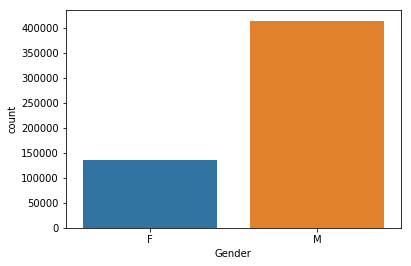

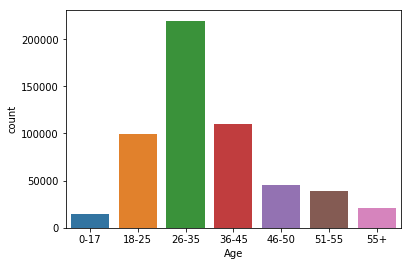

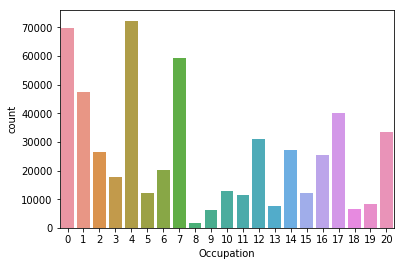

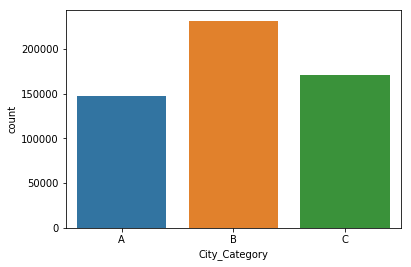

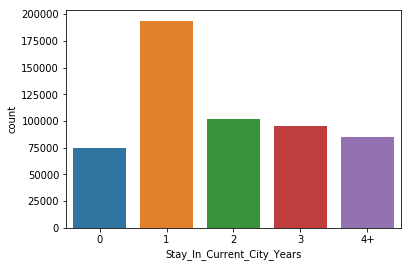

In [14]:
# Analysis by Gender, Age, Occupation, city_category and stay in current years
plt.subplots_adjust(hspace = 1.8)
for j in (df_final.columns[0:5]):
    plt.figure()
    print(sns.countplot(df_final[j]))    

#### Majority of the Customers are Males.
#### Majority of the customers are from 26-35 age group.
#### Most of them are from City B.
#### Most of them stay for 1 year.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


<Figure size 432x288 with 0 Axes>

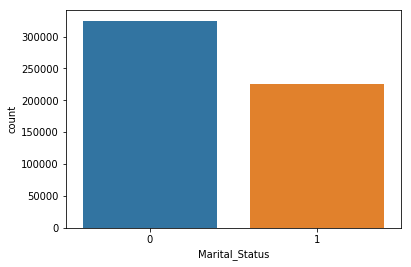

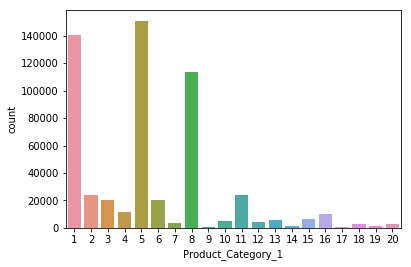

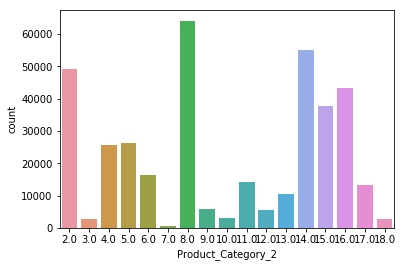

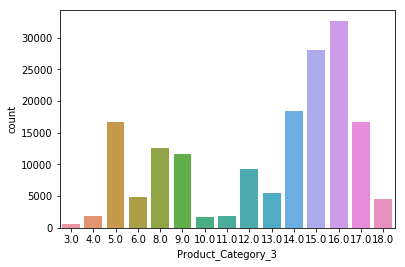

In [15]:
# Analysis by Gender, Age, Occupation and city_category
plt.subplots_adjust(hspace = 1.8)
for j in (df_final.columns[5:9]):
    plt.figure()
    print(sns.countplot(df_final[j]))    

#### Product codes 5,8,1 seem to be highest selling in Product_catgory type 1
#### Product codes 2,8,14 seem to be highest selling in Product_catgory type 2
#### Product codes 15,16 seem to be highest selling in Product_catgory type 3

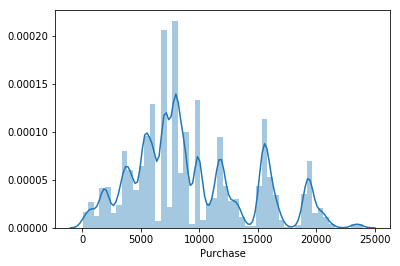

In [16]:
numeric_features=df_final.select_dtypes(include=[np.number])
for i, col in enumerate(numeric_features.columns):
    plt.figure(i)
    sns.distplot(df_final[col])

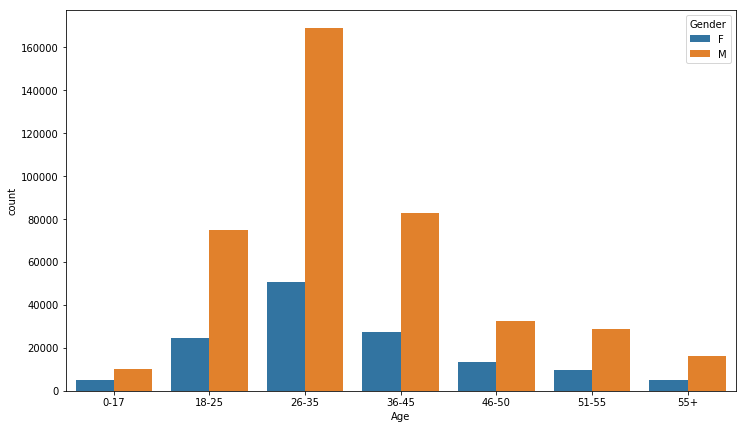

In [17]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(df_final['Age'],hue=df_final['Gender'])

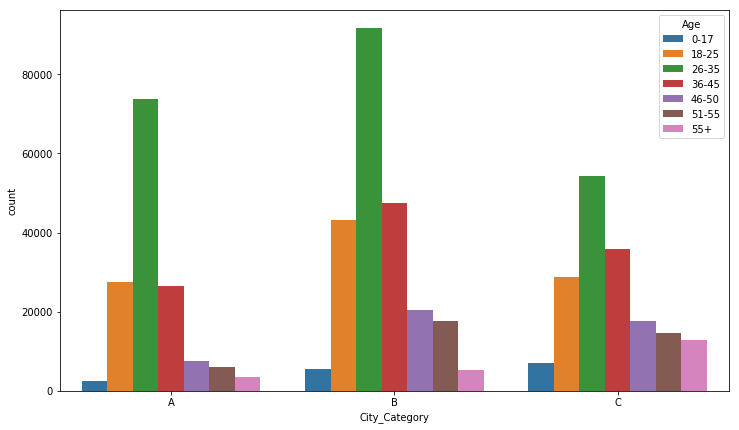

In [18]:
fig1, ax1 = plt.subplots(figsize=(12,7))

sns.countplot(df_final['City_Category'],hue=df_final['Age'])

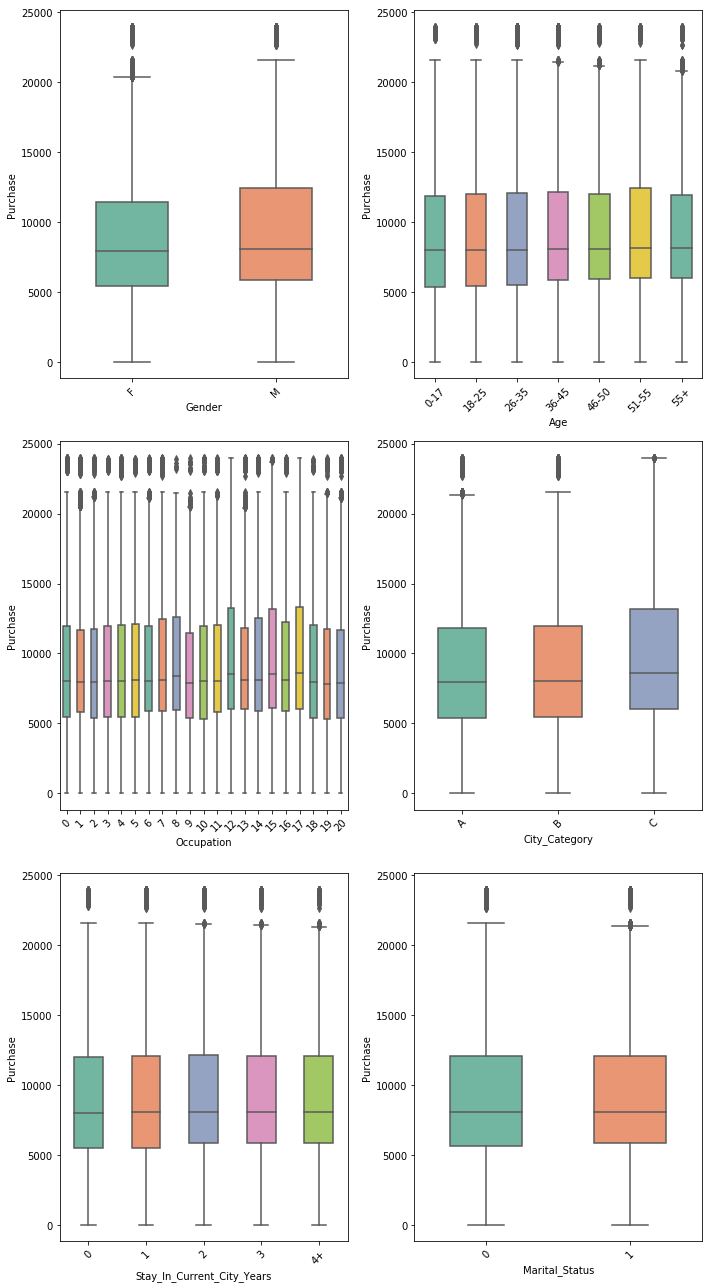

In [19]:
boxplots = df_final[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Purchase']]
cmap = sns.color_palette("Set2")

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10, 18))
a = [i for i in axes for i in i]
for i, ax in enumerate(a):
    sns.boxplot(y='Purchase', x=boxplots.columns[i], data=boxplots, palette=cmap, width=0.5, ax=ax);

# rotate x-axis for every single plot
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

# set spacing for every subplot, else x-axis will be covered
plt.tight_layout()

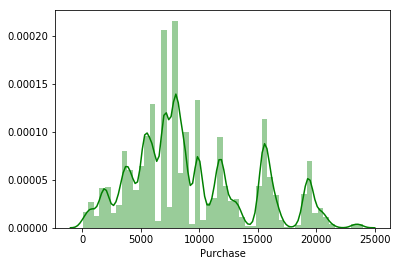

In [20]:
ax = sns.distplot(df_final['Purchase'], color='green')
plt.show()

In [6]:
# Merge train and test data to have same levels in both datasets
test_sub = test_df.loc[:,'Gender':'Product_Category_3'].astype('category')
test_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
Gender                        233599 non-null category
Age                           233599 non-null category
Occupation                    233599 non-null category
City_Category                 233599 non-null category
Stay_In_Current_City_Years    233599 non-null category
Marital_Status                233599 non-null category
Product_Category_1            233599 non-null category
Product_Category_2            161255 non-null category
Product_Category_3            71037 non-null category
dtypes: category(9)
memory usage: 2.0 MB


In [7]:
train_sub = df_final.loc[:,'Gender':'Product_Category_3']
train_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 9 columns):
Gender                        550068 non-null category
Age                           550068 non-null category
Occupation                    550068 non-null category
City_Category                 550068 non-null category
Stay_In_Current_City_Years    550068 non-null category
Marital_Status                550068 non-null category
Product_Category_1            550068 non-null category
Product_Category_2            376430 non-null category
Product_Category_3            166821 non-null category
dtypes: category(9)
memory usage: 4.7 MB


In [8]:
#get dummy variables
merge_df = train_sub.append(test_sub)
merge_df.Product_Category_1 = merge_df.Product_Category_1.astype('category')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 9 columns):
Gender                        783667 non-null category
Age                           783667 non-null category
Occupation                    783667 non-null category
City_Category                 783667 non-null category
Stay_In_Current_City_Years    783667 non-null category
Marital_Status                783667 non-null category
Product_Category_1            783667 non-null category
Product_Category_2            537685 non-null category
Product_Category_3            237858 non-null category
dtypes: category(9)
memory usage: 12.7 MB


In [9]:
#get dummy variables
merge_dummy = pd.get_dummies(merge_df,dummy_na=True,drop_first=True)
print(merge_dummy.shape)

(783667, 92)


In [10]:
# Separation of train and test rows
train_model = merge_dummy.iloc[0:(len(df)),]
test_model = merge_dummy.iloc[(len(df)):,]
train_model['Purchase'] = df.Purchase

# Train data for model building

In [ ]:
# correlation = df_model.corr()
# print(correlation['Purchase'].sort_values(ascending = False))

# Linear Regression

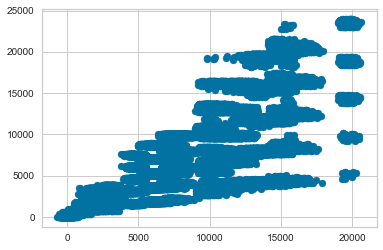

In [16]:
feats = [f for f in train_model.columns if f not in ['Purchase']]
y = train_model['Purchase']
X = train_model[feats]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm = LinearRegression()
model = lm.fit(X_train,y_train)
scores = cross_val_score(model, X_train, y_train, cv=4)
predictions = lm.predict(X_test)
plt.scatter(predictions,y_test)

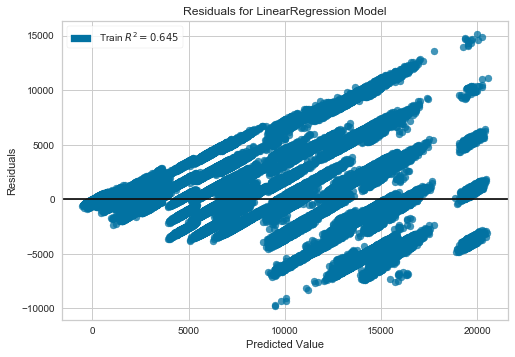

In [230]:
visualizer = ResidualsPlot(lm,hist=False)
visualizer.fit(X_test, y_test)  # Fit the training data to the model

# Evaluate the model on the test data
visualizer.poof()  

In [237]:
# print('Coefficients: \n', lm.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))

print("Root Mean squared error: %.2f"
      % (mean_squared_error(y_test, predictions))**0.5)

Mean squared error: 8972528.71
Root Mean squared error: 2995.42


#### There is a distinctive pattern in the Residual plots. The residuals are not spread around the horizontal line equally.

# Prediction on Main Test Data

In [235]:
# Predictions
X_test_model = test_model[feats]
predicted_val = lm.predict(X_test)
predictions_val = pd.DataFrame()
test_final = test_df.loc[:,['User_ID','Product_ID']]
predictions_val['Purchase'] = predicted_val
submissions = pd.concat([test_final,predictions_val],axis=1)
submissions.to_csv("submission_lm.csv",index=False)

#### The RMSE on the test data is 8848.60. Let's model on the entire train without splitting as the validation data set is already separated

# Linear Model on Full Train Data  

In [11]:
# Splitting the data 
feats = [f for f in train_model.columns if f not in ['Purchase']]
y_train = train_model['Purchase']
X_train = train_model[feats]
X_test = test_model[feats]

In [ ]:
clf = LinearRegression()
model_full =clf.fit(X_train, y_train)
scores = cross_val_score(model_full, X_train, y_train, cv=4)
predicted_full = clf.predict(X_test)
predictions_full = pd.DataFrame()
predictions_full['Purchase'] = predicted_full
submissions_full = pd.concat([test_final,predictions_full],axis=1)
submissions_full.to_csv("submission_full.csv",index=False)

#### The RMSE on the test data is 2991.93. 

# Ridge Regression

The Ridge() function has an alpha argument ( λ , but with a different name!) that is used to tune the model. We'll generate an array of alpha values ranging from very big to very small, essentially covering the full range of scenarios from the null model containing only the intercept, to the least squares fit:

In [36]:
#Feature importance using lasso
alphas = 10**np.linspace(10,-2,100)*0.5

Associated with each alpha value is a vector of ridge regression coefficients, which we'll store in a matrix coefs. In this case, it is a  19×100  matrix, with 19 rows (one for each predictor) and 100 columns (one for each value of alpha). Remember that we'll want to standardize the variables so that they are on the same scale. To do this, we can use the normalize = True parameter:

In [247]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 92)

Text(0,0.5,'weights')

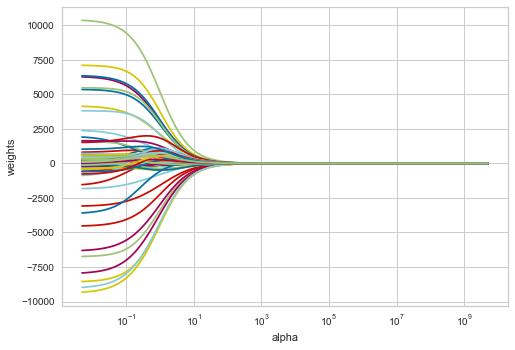

In [248]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [37]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

#### Therefore, we see that the value of alpha that results in the smallest cross-validation error is 0.05

In [38]:
ridge4 = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge4.fit(X_train, y_train)
pred_ridge = ridge4.predict(X_test)
predictions_ridge = pd.DataFrame()
predictions_ridge['Purchase'] = pred_ridge
submissions_ridge = pd.concat([test_final,predictions_ridge],axis=1)
submissions_ridge.to_csv("submissions_ridge.csv",index=False)

#### The RMSE on the test data is 2991.86

In [253]:
pd.Series(ridge4.coef_, index = X_train.columns)[1:20]

Gender_M         -26.416647
Age_0-17          17.879227
Age_18-25       -147.491005
Age_26-35        -68.612830
Age_36-45         47.484991
Age_46-50         62.245450
Age_51-55        293.530256
Age_55+          170.711336
Occupation_0     -90.847963
Occupation_1    -133.755710
Occupation_2     -46.565471
Occupation_3     148.971908
Occupation_4      58.190878
Occupation_5     -26.345117
Occupation_6     113.923452
Occupation_7      17.824540
Occupation_8    -371.123983
Occupation_9      13.379384
Occupation_10   -128.033204
dtype: float64

# Lasso Regression

In [31]:
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.008209943153450597, copy_X=True, fit_intercept=True,
   max_iter=10000, normalize=True, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
pred_lasso = lasso.predict(X_test)
predictions_lasso = pd.DataFrame()
predictions_lasso['Purchase'] = pred_lasso
submissions_lasso = pd.concat([test_final,predictions_lasso],axis=1)
submissions_lasso.to_csv("submissions_lasso.csv",index=False)

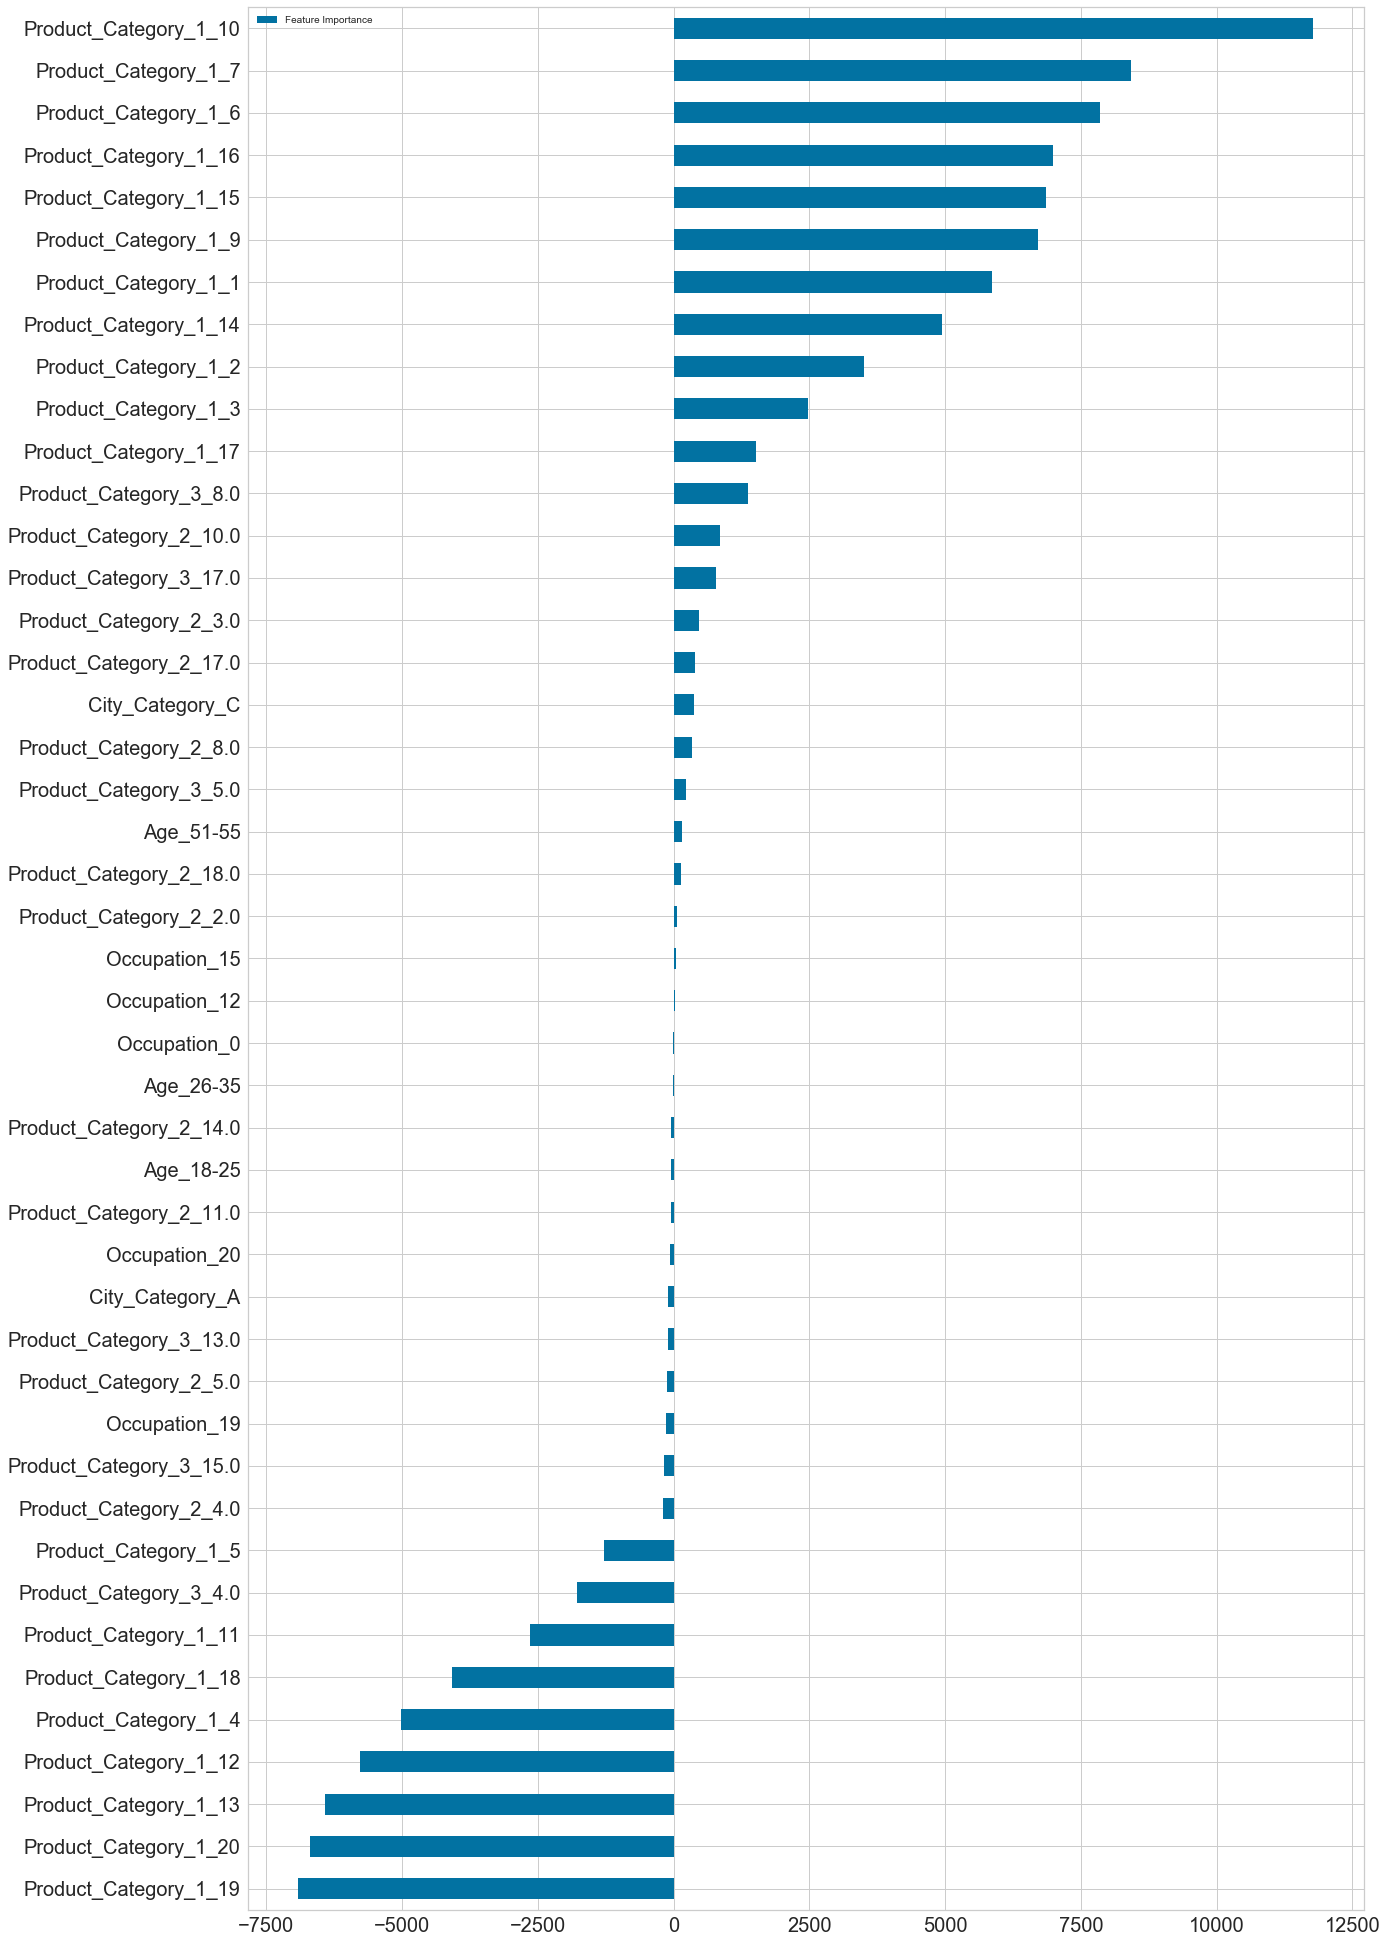

In [24]:
#Feature Imortance
lassoCoeff = pd.DataFrame({"Feature Importance":lasso.coef_}, index=train_model.drop(columns = 'Purchase').columns)
lassoCoeff.sort_values("Feature Importance",ascending=False)
lassoCoeff[lassoCoeff["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",
                                                                                       figsize=(20,35),fontsize= 20)

#### The RMSE on the test data is 3007.8. Ridge is performing is better than Lasso.

# Random Forest

In [ ]:
# # Perform Grid-Search
# gsc = GridSearchCV(estimator=RandomForestRegressor(),
#                    param_grid={'max_depth': range(5,6),
#                                'n_estimators': (1500,2000),
#                               }, cv=5, scoring='neg_mean_squared_error', 
#                    verbose=0, n_jobs=-1)
    
# grid_result = gsc.fit(X_train, y_train)


In [35]:
regressor = RandomForestRegressor(n_estimators=1500,
                            random_state=0, max_depth=10)

In [36]:
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
test_final = test_df.loc[:,['User_ID','Product_ID']]
pred_rfr = regressor.predict(X_test)
predictions_rfr = pd.DataFrame()
predictions_rfr['Purchase'] = pred_rfr
submissions_rfr = pd.concat([test_final,predictions_rfr],axis=1)
submissions_rfr.to_csv("submissions_rfr1.csv",index=False)